# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 2. Import Dataset

In [ ]:
import pandas as pd, zipfile; df = pd.read_csv(zipfile.ZipFile('/content/archive (1).zip').open([f for f in zipfile.ZipFile('/content/archive (1).zip').namelist() if f.endswith('.csv')][0]), encoding='latin1'); print(df.head())



                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

# 3. Data Cleaning (Check and Handle Missing Values)


In [ ]:

print("Missing Values:")
print(df.isnull().sum())


df = df.dropna(subset=['Rating'])

df.fillna('Unknown', inplace=True)
print("Missing values after cleaning:")
print(df['Rating'].isnull().sum())


Missing Values:
Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64
Missing values after cleaning:
0


# 4. Visualize the Data (Bar Chart and Pie Chart)

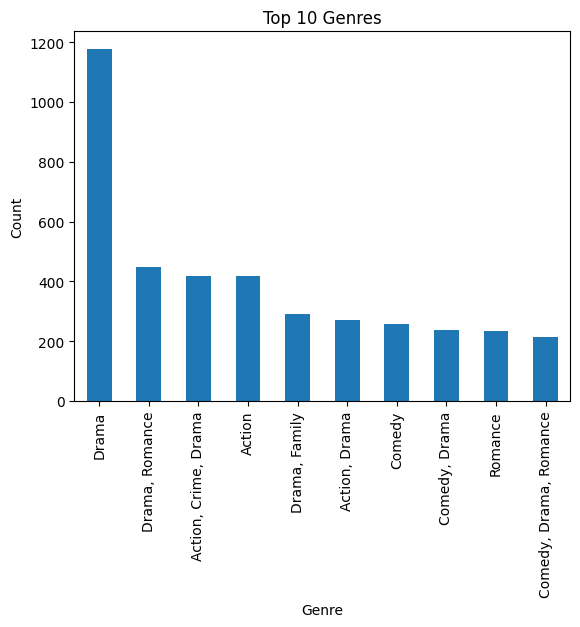

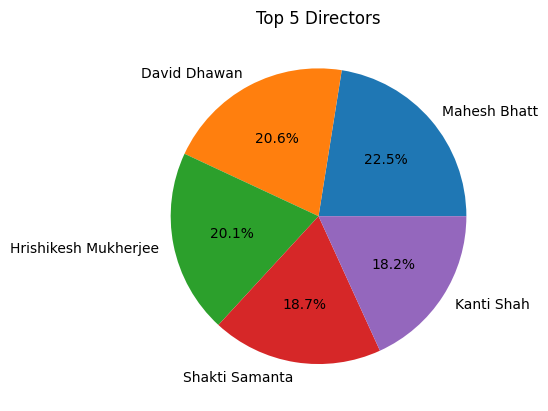

In [ ]:
import matplotlib.pyplot as plt


genre_counts = df['Genre'].value_counts().head(10)
genre_counts.plot(kind='bar', title='Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()
top_directors = df['Director'].value_counts().head(5)
top_directors.plot(kind='pie', autopct='%1.1f%%', title='Top 5 Directors')
plt.ylabel('')
plt.show()


# 5. Split the Data into Training and Testing Sets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
director_col = None
for col in df.columns:
    if 'director' in col.lower():
        director_col = col
        break

if director_col is None:
    raise ValueError("Director column not found in the dataset!")


df = pd.get_dummies(df, columns=[director_col], drop_first=True
cols_to_drop = ['Name', 'Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']
cols_to_drop = [col for col in cols_to_drop if col in df.columns]


X = df.drop(columns=cols_to_drop)
y = df['Rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split complete. Training samples:", len(X_train))


Data split complete. Training samples: 6335


# 6. Train the Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training complete!")
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"Model R² Score: {score:.2f}")


results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results.head())



Model training complete!
Model R² Score: -0.02
   Actual  Predicted
0     3.3   6.329000
1     5.3   4.494000
2     5.7   5.933983
3     7.2   6.014000
4     3.5   5.890000


# 7.Predict on the test set and evaluate model performance

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Squared Error (MSE): 104.20
R² Score: 0.94
